In [2]:
import numpy as np 
import pandas as pd 

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import jaccard_score

In [3]:
df = pd.read_excel('/kaggle/input/dataset/. .xlsx')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Дата заявки,Код заявки,Дата УДЛ клиента,Кредитный продукт,Заявленный официальный доход с анкеты,Менеджер,Запрошенная сумма кредита,Город,БИН работодаетя с отчета с ГЦВП,Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ,Кол-во завершенных займов с кредитной истории ПКБ,Сумма остатка по всем займам с кредитной истории ПКБ,Кол-ао действующих займов клиента кредитной истории ПКБ,Кол-во запросов в ПКБ за последние 30 дней,Срок займа в мес,Признак вызревания CENZ_15_1,FPD_15,Признак вызревания CENZ_15_2,SPD_15,Активная просрочка в днях
0,2022-06-24,KAR.00095934,2006-12-14,Автокредитов,308260.0,Налыбек,2800000,Караганд,NaN,0.0,2.0,2290527.0,3,77.0,NaN,1,0,1,0,0
1,2022-06-23,1003534418,2013-01-10,Кредит налич,270000.0,Уштенова,1500000,Нур-Султ,990240003263/,0.0,9.0,2016655.0,4,36.0,5.0,1,0,1,0,0
2,2022-05-26,BCC_5407,2017-09-20,#картакарта_v,180000.0,Пользователь,70000,Тараз,991040000928/,9.0,4.0,347444.0,2,27.0,11.0,0,0,0,0,0
3,2022-05-15,BCC_1976,2006-08-28,#картакарта_v,800000.0,Пользователь,200000,Алматы,981141001567/,0.0,9.0,6297948.0,10,26.0,6.0,0,0,0,0,0
4,2022-04-29,ALM.00285810,2021-02-19,Автокредитов,600000.0,Мешітбай,11500000,Алматы,890111301342/,2.0,7.0,1974935.0,4,25.0,3.0,1,0,1,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25531,2022-06-02,SMK.00117089,2020-01-23,Автокредитов,382000.0,Јбдіразаќ,6490000,Шымкент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0
25532,2022-06-21,SMK.00118850,2021-08-23,Автокредитов,350000.0,Ертаев,4490000,Шымкент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0
25533,2022-06-21,1003514446,2006-10-18,Кредит налич,0.0,Ќанатбек,750000,Шымкент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0
25534,2022-06-17,BCC_9372,2014-06-13,#картакарта_v,0.0,Пользователь,200000,Алматы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [4]:
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Дата заявки,Код заявки,Дата УДЛ клиента,Кредитный продукт,Заявленный официальный доход с анкеты,Менеджер,Запрошенная сумма кредита,Город,БИН работодаетя с отчета с ГЦВП,Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ,Кол-во завершенных займов с кредитной истории ПКБ,Сумма остатка по всем займам с кредитной истории ПКБ,Кол-ао действующих займов клиента кредитной истории ПКБ,Кол-во запросов в ПКБ за последние 30 дней,Срок займа в мес,Признак вызревания CENZ_15_1,FPD_15,Признак вызревания CENZ_15_2,SPD_15,Активная просрочка в днях
0,2022-06-24,KAR.00095934,2006-12-14,Автокредитов,308260.0,Налыбек,2800000,Караганд,NaN,0.0,2.0,2290527.0,3,77.0,NaN,1,0,1,0,0
1,2022-06-23,1003534418,2013-01-10,Кредит налич,270000.0,Уштенова,1500000,Нур-Султ,990240003263/,0.0,9.0,2016655.0,4,36.0,5.0,1,0,1,0,0
2,2022-05-26,BCC_5407,2017-09-20,#картакарта_v,180000.0,Пользователь,70000,Тараз,991040000928/,9.0,4.0,347444.0,2,27.0,11.0,0,0,0,0,0
3,2022-05-15,BCC_1976,2006-08-28,#картакарта_v,800000.0,Пользователь,200000,Алматы,981141001567/,0.0,9.0,6297948.0,10,26.0,6.0,0,0,0,0,0
4,2022-04-29,ALM.00285810,2021-02-19,Автокредитов,600000.0,Мешітбай,11500000,Алматы,890111301342/,2.0,7.0,1974935.0,4,25.0,3.0,1,0,1,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25531,2022-06-02,SMK.00117089,2020-01-23,Автокредитов,382000.0,Јбдіразаќ,6490000,Шымкент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0
25532,2022-06-21,SMK.00118850,2021-08-23,Автокредитов,350000.0,Ертаев,4490000,Шымкент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0
25533,2022-06-21,1003514446,2006-10-18,Кредит налич,0.0,Ќанатбек,750000,Шымкент,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0
25534,2022-06-17,BCC_9372,2014-06-13,#картакарта_v,0.0,Пользователь,200000,Алматы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0


In [5]:
### Начнем

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25536 entries, 0 to 25535
Data columns (total 20 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Дата заявки                                                      25536 non-null  datetime64[ns]
 1   Код заявки                                                       25536 non-null  object        
 2   Дата УДЛ клиента                                                 25275 non-null  datetime64[ns]
 3   Кредитный продукт                                                25536 non-null  object        
 4   Заявленный официальный доход с анкеты                            25536 non-null  float64       
 5   Менеджер                                                         25536 non-null  object        
 6   Запрошенная сумма кредита                                        25536 non-nul

In [7]:
df.describe()

,Дата заявки,Дата УДЛ клиента,Заявленный официальный доход с анкеты,Запрошенная сумма кредита,Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ,Кол-во завершенных займов с кредитной истории ПКБ,Сумма остатка по всем займам с кредитной истории ПКБ,Кол-во запросов в ПКБ за последние 30 дней,Срок займа в мес,Признак вызревания CENZ_15_1,FPD_15,Признак вызревания CENZ_15_2,SPD_15,Активная просрочка в днях
count,25536,25275,2.553600e+04,2.553600e+04,25045.000000,25045.000000,2.504500e+04,25045.000000,21896.000000,25536.000000,25536.000000,25536.000000,25536.000000,25536.000000
mean,2022-05-16 19:58:38.796992512,2016-10-04 21:32:19.513353216,7.498812e+05,6.322739e+06,4.227191,5.466560,2.233179e+06,1.454422,8.523018,0.945410,0.004347,0.935385,0.007793,0.534814
min,2022-04-01 00:00:00,1996-02-01 00:00:00,0.000000e+00,2.000000e+04,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2022-04-25 00:00:00,2014-04-30 00:00:00,2.200000e+05,1.579000e+06,0.000000,1.000000,3.735300e+04,0.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2022-05-18 00:00:00,2017-01-10 00:00:00,3.500000e+05,5.000000e+06,0.000000,4.000000,4.973540e+05,1.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2022-06-07 00:00:00,2020-06-29 00:00:00,6.500000e+05,9.500000e+06,0.000000,7.000000,1.920484e+06,2.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2022-06-30 00:00:00,2022-06-23 00:00:00,1.000000e+09,1.960000e+08,6181.000000,531.000000,1.803606e+08,77.000000,145.000000,1.000000,1.000000,1.000000,1.000000,152.000000
std,NaN,NaN,6.548631e+06,6.381298e+06,87.977585,8.737972,5.040156e+06,2.206870,5.034625,0.227182,0.065788,0.245849,0.087935,6.038876


In [10]:
### Сохраним на удаление не нужные поля
feature_delete = []
feature_delete.append('Код заявки')

### feature analysis

In [11]:
df.isna().sum() / df.shape[0] * 100

Дата заявки                                                         0.000000
Код заявки                                                          0.000000
Дата УДЛ клиента                                                    1.022086
Кредитный продукт                                                   0.000000
Заявленный официальный доход с анкеты                               0.000000
Менеджер                                                            0.000000
Запрошенная сумма кредита                                           0.000000
Город                                                               0.000000
БИН работодаетя с отчета с ГЦВП                                    14.673402
Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ     1.922776
Кол-во завершенных займов с кредитной истории ПКБ                   1.922776
Сумма остатка по всем займам с кредитной истории ПКБ                1.922776
Кол-ао действующих займов клиента кредитной истории ПКБ             1.922776

In [12]:
### Так-то у фичей не такой большой % пропусков. Оставляем все

#### Кредитный продукт

In [13]:
df['Кредитный продукт'].unique()

array(['Автокредитов', 'Кредит налич', '#картакарта_v', '#залоговыйкр',
       'Ипотека', 'Рефинансиров', 'Товарный кре'], dtype=object)

In [14]:
df.groupby(['Кредитный продукт']).count()['Код заявки']

### Обработаем через One-Hot

Кредитный продукт
#залоговыйкр     3213
#картакарта_v     734
Автокредитов     7006
Ипотека          4654
Кредит налич     7961
Рефинансиров     1940
Товарный кре       28
Name: Код заявки, dtype: int64

#### Менеджер

In [15]:
df[['Менеджер', 'БИН работодаетя с отчета с ГЦВП']].nunique()

Менеджер                             908
БИН работодаетя с отчета с ГЦВП    14358
dtype: int64

In [16]:
### Удаляем!
### Причины:
### не информативен


In [17]:
feature_delete.append('Менеджер')
feature_delete.append('БИН работодаетя с отчета с ГЦВП')

#### Город

In [18]:
df['Город'].nunique()

19

In [19]:
df.groupby(['Город']).count()['Код заявки'].sort_values()

Город
MOB_APP       99
Петропав     333
Жезказга     341
Актау        607
Кокшетау     658
Павлодар     761
Атырау       807
Тараз        876
Уральск      910
Кызылорд     966
Семей        974
Актобе       990
Костанай    1064
Талдыкор    1073
Усть-Кам    1340
Караганд    2183
Шымкент     2692
Нур-Султ    3808
Алматы      5054
Name: Код заявки, dtype: int64

In [20]:
### Не понятно, что значит MOB_APP. Но оставим ;)

#### Пройдемся теперь по числовым фичам

In [21]:
def detect_outliers_iqr(data):

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers


#### Заявленный официальный доход с анкеты

In [22]:
df['Заявленный официальный доход с анкеты'].isna().sum()

0

In [23]:
df['Заявленный официальный доход с анкеты']

0         308260.0
1         270000.0
2         180000.0
3         800000.0
4         600000.0
           ...    
25531     382000.0
25532     350000.0
25533          0.0
25534          0.0
25535    3000000.0
Name: Заявленный официальный доход с анкеты, Length: 25536, dtype: float64

<Axes: >

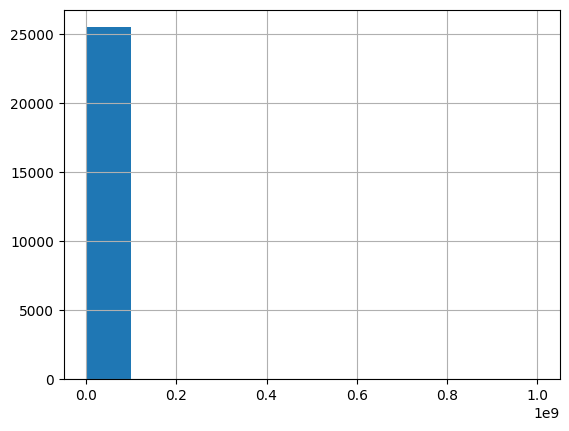

In [24]:
df['Заявленный официальный доход с анкеты'].hist()

In [25]:
df['Заявленный официальный доход с анкеты'].describe()

count    2.553600e+04
mean     7.498812e+05
std      6.548631e+06
min      0.000000e+00
25%      2.200000e+05
50%      3.500000e+05
75%      6.500000e+05
max      1.000000e+09
Name: Заявленный официальный доход с анкеты, dtype: float64

In [26]:
detect_outliers_iqr(df['Заявленный официальный доход с анкеты']).shape[0]

2757

In [27]:
### Видно, что есть выбросы. Но удалять их нельзя, так как они именно могут быть фродом

In [28]:
np.log1p(df['Заявленный официальный доход с анкеты']).describe()

count    25536.000000
mean        12.415840
std          2.757697
min          0.000000
25%         12.301387
50%         12.765691
75%         13.384729
max         20.723266
Name: Заявленный официальный доход с анкеты, dtype: float64

In [29]:
df['Заявленный официальный доход с анкеты'] = np.log1p(df['Заявленный официальный доход с анкеты'])

#### Запрошенная сумма кредита

In [30]:
df['Запрошенная сумма кредита'].isna().sum()

0

<Axes: >

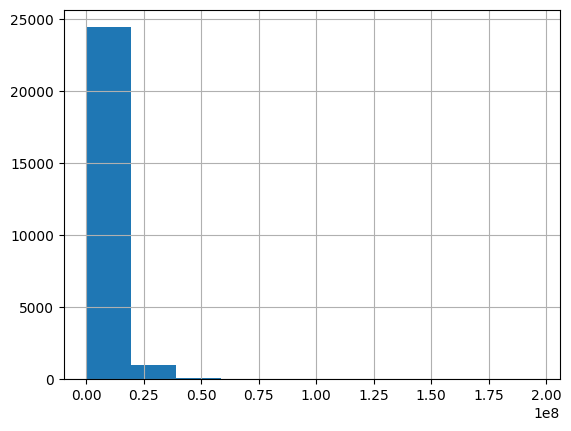

In [31]:
df['Запрошенная сумма кредита'].hist()

In [32]:
detect_outliers_iqr(df['Запрошенная сумма кредита'])

55       32211000
170      25000000
201      27000000
303      42000000
377      55000000
           ...   
25235    31500000
25258    40000000
25264    25990000
25270    43024000
25379    24866000
Name: Запрошенная сумма кредита, Length: 369, dtype: int64

In [33]:
### Видно что есть выбросы

<Axes: >

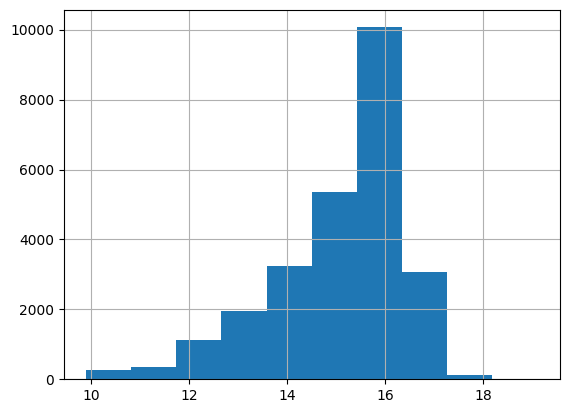

In [34]:
np.log1p(df['Запрошенная сумма кредита']).hist()

In [35]:
df['Запрошенная сумма кредита'] = np.log1p(df['Запрошенная сумма кредита'])

#### Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ

In [36]:
df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].isna().sum()

491

<Axes: >

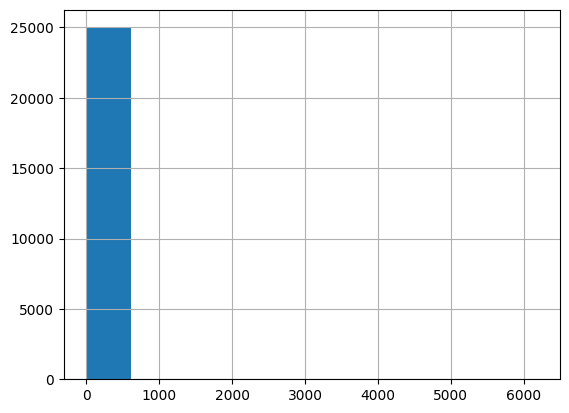

In [37]:
df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].hist()

In [38]:
df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].describe()

count    25045.000000
mean         4.227191
std         87.977585
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6181.000000
Name: Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ, dtype: float64

In [39]:
detect_outliers_iqr(df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'])

Series([], Name: Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ, dtype: float64)

In [40]:
### Выбросов нет по IQR, но слишком много нулей и еще есть пропуски, 
### к тому же больша разница между mean и std (в 20 раз)
### И гистогрммка показывает, что есть какие-то аномальные значения

In [41]:
df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        0.0
1        0.0
2        9.0
3        0.0
4        2.0
        ... 
25531    NaN
25532    NaN
25533    NaN
25534    NaN
25535    NaN
Name: Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ, Length: 25536, dtype: float64

In [42]:
minimum = min(df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'])
def binarization(num):
    if num > minimum:
        return int(num > 0)
    return num

def is_nan_func(num):
    if num >= 0:
        return 0
    return 1

df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'] = (
    df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].apply(binarization)
)

df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ is Nan'] = (
    df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].apply(is_nan_func)
)

# df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ']

In [43]:
fill_value = df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].median()
df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].fillna(fill_value, inplace = True)

/tmp/ipykernel_64/321431377.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ'].fillna(fill_value, inplace = True)


#### Кол-во завершенных займов с кредитной истории ПКБ

In [44]:
df['Кол-во завершенных займов с кредитной истории ПКБ'].isna().sum()

491

<Axes: >

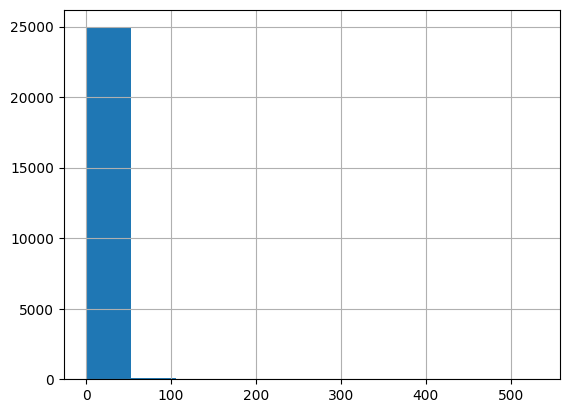

In [45]:
df['Кол-во завершенных займов с кредитной истории ПКБ'].hist()

In [46]:
df['Кол-во завершенных займов с кредитной истории ПКБ'].describe()

count    25045.000000
mean         5.466560
std          8.737972
min          0.000000
25%          1.000000
50%          4.000000
75%          7.000000
max        531.000000
Name: Кол-во завершенных займов с кредитной истории ПКБ, dtype: float64

In [47]:
detect_outliers_iqr(df['Кол-во завершенных займов с кредитной истории ПКБ'])

Series([], Name: Кол-во завершенных займов с кредитной истории ПКБ, dtype: float64)

In [48]:
df['Кол-во завершенных займов с кредитной истории ПКБ']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        2.0
1        9.0
2        4.0
3        9.0
4        7.0
        ... 
25531    NaN
25532    NaN
25533    NaN
25534    NaN
25535    NaN
Name: Кол-во завершенных займов с кредитной истории ПКБ, Length: 25536, dtype: float64

In [49]:
np.log1p(df['Кол-во завершенных займов с кредитной истории ПКБ'])

0        1.098612
1        2.302585
2        1.609438
3        2.302585
4        2.079442
           ...   
25531         NaN
25532         NaN
25533         NaN
25534         NaN
25535         NaN
Name: Кол-во завершенных займов с кредитной истории ПКБ, Length: 25536, dtype: float64

In [50]:
df['Кол-во завершенных займов с кредитной истории ПКБ'] = np.log1p(df['Кол-во завершенных займов с кредитной истории ПКБ'])

In [51]:
df['Кол-во завершенных займов с кредитной истории ПКБ']

0        1.098612
1        2.302585
2        1.609438
3        2.302585
4        2.079442
           ...   
25531         NaN
25532         NaN
25533         NaN
25534         NaN
25535         NaN
Name: Кол-во завершенных займов с кредитной истории ПКБ, Length: 25536, dtype: float64

In [52]:
df['Кол-во завершенных займов с кредитной истории ПКБ is Nan'] = (
    df['Кол-во завершенных займов с кредитной истории ПКБ'].apply(is_nan_func)
)

In [53]:
df['Кол-во завершенных займов с кредитной истории ПКБ is Nan']

0        0
1        0
2        0
3        0
4        0
        ..
25531    1
25532    1
25533    1
25534    1
25535    1
Name: Кол-во завершенных займов с кредитной истории ПКБ is Nan, Length: 25536, dtype: int64

In [54]:
fill_value = df['Кол-во завершенных займов с кредитной истории ПКБ'].median()
df['Кол-во завершенных займов с кредитной истории ПКБ'].fillna(fill_value, inplace = True)

#### Сумма остатка по всем займам с кредитной истории ПКБ

In [55]:
df['Сумма остатка по всем займам с кредитной истории ПКБ']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        2290527.0
1        2016655.0
2         347444.0
3        6297948.0
4        1974935.0
           ...    
25531          NaN
25532          NaN
25533          NaN
25534          NaN
25535          NaN
Name: Сумма остатка по всем займам с кредитной истории ПКБ, Length: 25536, dtype: float64

<Axes: >

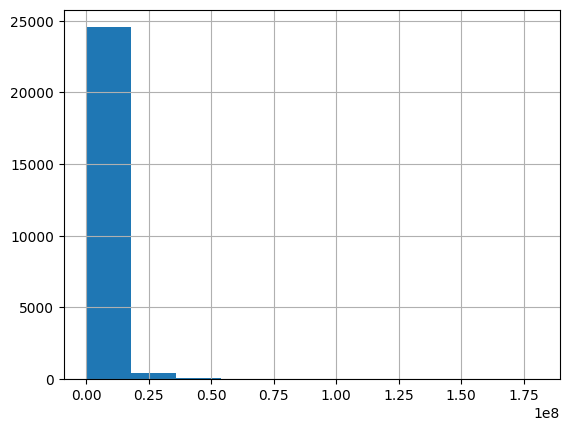

In [56]:
df['Сумма остатка по всем займам с кредитной истории ПКБ'].hist()

In [57]:
df['Сумма остатка по всем займам с кредитной истории ПКБ'].describe()

count    2.504500e+04
mean     2.233179e+06
std      5.040156e+06
min      0.000000e+00
25%      3.735300e+04
50%      4.973540e+05
75%      1.920484e+06
max      1.803606e+08
Name: Сумма остатка по всем займам с кредитной истории ПКБ, dtype: float64

In [58]:
df['Сумма остатка по всем займам с кредитной истории ПКБ'].isna().sum()

491

In [59]:
df['Сумма остатка по всем займам с кредитной истории ПКБ'] = (
    np.log1p(df['Сумма остатка по всем займам с кредитной истории ПКБ'])
)

In [60]:
df['Сумма остатка по всем займам с кредитной истории ПКБ is Nan'] = (
    df['Сумма остатка по всем займам с кредитной истории ПКБ'].apply(is_nan_func)
)

In [61]:
fill_value = df['Сумма остатка по всем займам с кредитной истории ПКБ'].median()
df['Сумма остатка по всем займам с кредитной истории ПКБ'].fillna(fill_value, inplace = True)

/tmp/ipykernel_64/1011455564.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Сумма остатка по всем займам с кредитной истории ПКБ'].fillna(fill_value, inplace = True)


#### Кол-ао действующих займов клиента кредитной истории ПКБ

In [62]:
df['Кол-ао действующих займов клиента кредитной истории ПКБ']

0          3
1          4
2          2
3         10
4          4
        ... 
25531    NaN
25532    NaN
25533    NaN
25534    NaN
25535    NaN
Name: Кол-ао действующих займов клиента кредитной истории ПКБ, Length: 25536, dtype: object

In [63]:
print(df['Кол-ао действующих займов клиента кредитной истории ПКБ'].isna().sum())
# df['Кол-ао действующих займов клиента кредитной истории ПКБ'] = df['Кол-ао действующих займов клиента кредитной истории ПКБ'].astype(float)
df['Кол-ао действующих займов клиента кредитной истории ПКБ'].unique()

491


array([3, 4, 2, 10, 8, 6, 5, 13, 18, 12, 1, 7, 11, 0, 9, 16, 14, 15, 17,
       21, 23, 19, ' ', nan], dtype=object)

In [64]:
def make_nums(s):
    try:
        return int(s)
    except:
        return np.nan

df['Кол-ао действующих займов клиента кредитной истории ПКБ'] = (
    df['Кол-ао действующих займов клиента кредитной истории ПКБ']
    .apply(make_nums)
)

<Axes: >

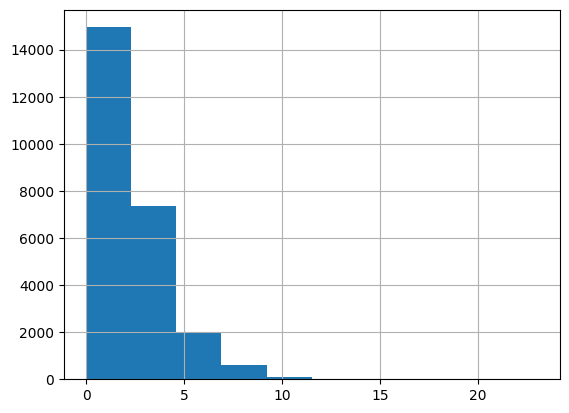

In [65]:
df['Кол-ао действующих займов клиента кредитной истории ПКБ'].hist()

In [66]:
df['Кол-ао действующих займов клиента кредитной истории ПКБ'].describe()

count    25044.000000
mean         2.471889
std          1.789743
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         23.000000
Name: Кол-ао действующих займов клиента кредитной истории ПКБ, dtype: float64

In [67]:
detect_outliers_iqr(df['Кол-ао действующих займов клиента кредитной истории ПКБ'])

Series([], Name: Кол-ао действующих займов клиента кредитной истории ПКБ, dtype: float64)

In [68]:
### Выбросов нет, но есть пропуски,

In [69]:
df['Кол-ао действующих займов клиента кредитной истории ПКБ is Nan'] = (
    df['Кол-ао действующих займов клиента кредитной истории ПКБ'].apply(is_nan_func)
)

In [70]:
fill_value = df['Кол-ао действующих займов клиента кредитной истории ПКБ'].median()
df['Кол-ао действующих займов клиента кредитной истории ПКБ'].fillna(fill_value, inplace = True)

/tmp/ipykernel_64/3921972686.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Кол-ао действующих займов клиента кредитной истории ПКБ'].fillna(fill_value, inplace = True)


#### Кол-во запросов в ПКБ за последние 30 дней

In [71]:
df['Кол-во запросов в ПКБ за последние 30 дней']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0        77.0
1        36.0
2        27.0
3        26.0
4        25.0
         ... 
25531     NaN
25532     NaN
25533     NaN
25534     NaN
25535     NaN
Name: Кол-во запросов в ПКБ за последние 30 дней, Length: 25536, dtype: float64

In [72]:
df['Кол-во запросов в ПКБ за последние 30 дней'].isna().sum()

491

<Axes: >

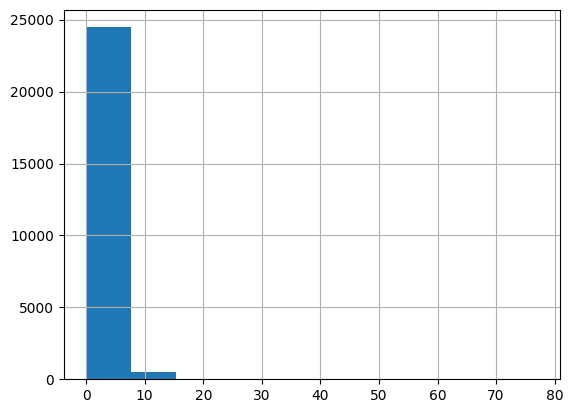

In [73]:
df['Кол-во запросов в ПКБ за последние 30 дней'].hist()

In [74]:
df['Кол-во запросов в ПКБ за последние 30 дней'].describe()

count    25045.000000
mean         1.454422
std          2.206870
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         77.000000
Name: Кол-во запросов в ПКБ за последние 30 дней, dtype: float64

In [75]:
detect_outliers_iqr(df['Кол-во запросов в ПКБ за последние 30 дней'])

Series([], Name: Кол-во запросов в ПКБ за последние 30 дней, dtype: float64)

In [76]:
df['Кол-во запросов в ПКБ за последние 30 дней is Nan'] = (
    df['Кол-во запросов в ПКБ за последние 30 дней'].apply(is_nan_func)
)

In [77]:
fill_value = df['Кол-во запросов в ПКБ за последние 30 дней'].median()
df['Кол-во запросов в ПКБ за последние 30 дней'].fillna(fill_value, inplace = True)

#### Срок займа в мес

In [78]:
df['Срок займа в мес'].isna().sum() / df.shape[0] * 100

14.25438596491228

In [79]:
df['Срок займа в мес']

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


0         NaN
1         5.0
2        11.0
3         6.0
4         3.0
         ... 
25531     NaN
25532     NaN
25533     NaN
25534     NaN
25535     NaN
Name: Срок займа в мес, Length: 25536, dtype: float64

<Axes: >

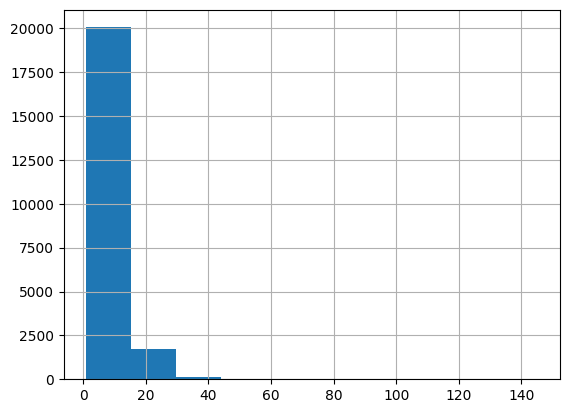

In [80]:
df['Срок займа в мес'].hist()

In [81]:
df['Срок займа в мес'].describe()

count    21896.000000
mean         8.523018
std          5.034625
min          1.000000
25%          6.000000
50%          6.000000
75%         10.000000
max        145.000000
Name: Срок займа в мес, dtype: float64

In [82]:
detect_outliers_iqr(df['Срок займа в мес'])

Series([], Name: Срок займа в мес, dtype: float64)

In [83]:
df['Срок займа в мес is Nan'] = (
    df['Срок займа в мес'].apply(is_nan_func)
)

In [84]:
fill_value = df['Срок займа в мес'].median()
df['Срок займа в мес'].fillna(fill_value, inplace = True)

#### Признак вызревания CENZ_15_1

In [85]:
df['Признак вызревания CENZ_15_1'].unique()

array([1, 0])

In [86]:
df['Признак вызревания CENZ_15_1'].isna().sum()

0

In [87]:
df.groupby(['Признак вызревания CENZ_15_1']).count()['Код заявки']

Признак вызревания CENZ_15_1
0     1394
1    24142
Name: Код заявки, dtype: int64

#### FPD_15

In [88]:
df['FPD_15'].isna().sum()

0

In [89]:
df['FPD_15'].unique()

array([0, 1])

In [90]:
df.groupby(['FPD_15']).count()['Код заявки']

FPD_15
0    25425
1      111
Name: Код заявки, dtype: int64

In [91]:
##№ Возможно и фрод

#### Признак вызревания CENZ_15_2

In [92]:
df['Признак вызревания CENZ_15_2']

0        1
1        1
2        0
3        0
4        1
        ..
25531    1
25532    1
25533    1
25534    0
25535    1
Name: Признак вызревания CENZ_15_2, Length: 25536, dtype: int64

In [93]:
df['Признак вызревания CENZ_15_2'].isna().sum()

0

In [94]:
df['Признак вызревания CENZ_15_2'].unique()

array([1, 0])

In [95]:
df.groupby(['Признак вызревания CENZ_15_2']).count()['Код заявки']

Признак вызревания CENZ_15_2
0     1650
1    23886
Name: Код заявки, dtype: int64

#### SPD_15

In [96]:
df['SPD_15']

0        0
1        0
2        0
3        0
4        0
        ..
25531    0
25532    0
25533    0
25534    0
25535    0
Name: SPD_15, Length: 25536, dtype: int64

In [97]:
df['SPD_15'].isna().sum()

0

In [98]:
df['SPD_15'].unique()

array([0, 1])

In [99]:
df.groupby(['SPD_15']).count()['Код заявки']

SPD_15
0    25337
1      199
Name: Код заявки, dtype: int64

#### Активная просрочка в дня

In [100]:
df['Активная просрочка в днях'].isna().sum()

0

In [101]:
df['Активная просрочка в днях'].unique()

array([  0,  39,  28,  56,  52,   6,  14,  12,  98,  10,  74,  42,   7,
         4, 143, 119,  27,  26,  17, 110,  59, 126,  95,  87,  13,  21,
        45,  18, 122,  49,  20,   5,   3, 133,  80,  38,  37,  19,  55,
        46,  25, 152, 112,  88,  70,  68,  33,  32,  31,  11,  63, 145,
       131,  82, 140, 138, 123, 105, 102,  94,  91,  90,  77,  48,  41,
        75,  60,  84,  81,  67, 104,  76, 136])

In [102]:
detect_outliers_iqr(df['Активная просрочка в днях'])

4        39
32       28
59       28
60       56
99       39
         ..
25059     3
25074    10
25240    32
25258    63
25266    70
Name: Активная просрочка в днях, Length: 437, dtype: int64

<Axes: >

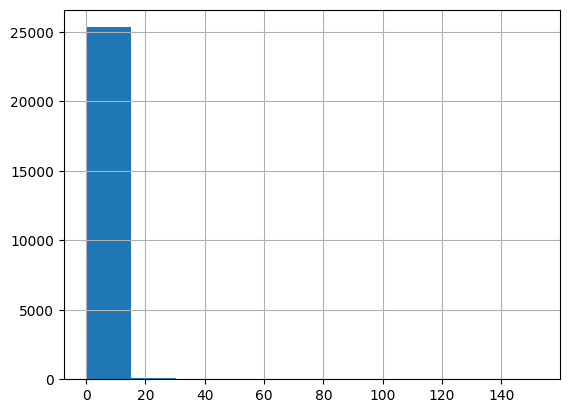

In [103]:
df['Активная просрочка в днях'].hist()

In [104]:
df['Активная просрочка в днях'].describe()

count    25536.000000
mean         0.534814
std          6.038876
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        152.000000
Name: Активная просрочка в днях, dtype: float64

In [105]:
df['Активная просрочка в днях'] = np.log1p(df['Активная просрочка в днях'])

#### Дата УДЛ клиента

In [107]:
df['Дата УДЛ клиента month'] = df['Дата УДЛ клиента'].dt.month
df['Дата УДЛ клиента is Nan'] = (
    df['Дата УДЛ клиента month'].apply(is_nan_func)
)

In [108]:
feature_delete.append('Дата УДЛ клиента')
feature_delete.append('Дата УДЛ клиента month')
feature_delete.append('Дата заявки')

In [109]:
df.drop(feature_delete, axis = 1, inplace = True)

In [110]:
cols = pd.get_dummies(df['Кредитный продукт'], dtype=int).columns.values.tolist()
df[cols] = pd.get_dummies(df['Кредитный продукт'], dtype=int)
df.drop(['Кредитный продукт'], axis = 1, inplace = True)

cols = pd.get_dummies(df['Город'], dtype=int).columns.values.tolist()
df[cols] = pd.get_dummies(df['Город'], dtype=int)
df.drop(['Город'], axis = 1, inplace = True)

In [111]:
# df.drop(['Кредитный продукт', 'Город'], axis = 1, inplace = True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25536 entries, 0 to 25535
Data columns (total 46 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Заявленный официальный доход с анкеты                                   25536 non-null  float64
 1   Запрошенная сумма кредита                                               25536 non-null  float64
 2   Просрочки за последние 6 месяцев в днях с кредитной истории ПКБ         25536 non-null  float64
 3   Кол-во завершенных займов с кредитной истории ПКБ                       25536 non-null  float64
 4   Сумма остатка по всем займам с кредитной истории ПКБ                    25536 non-null  float64
 5   Кол-ао действующих займов клиента кредитной истории ПКБ                 25536 non-null  float64
 6   Кол-во запросов в ПКБ за последние 30 дней                              25536 

In [150]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso = IsolationForest(n_estimators=100, contamination=0.01)
iso.fit(X_scaled)
iso_scores = -iso.decision_function(X_scaled)

iso_score_norm = (iso_scores - iso_scores.min()) / (iso_scores.max() - iso_scores.min())
df['iso_score'] = iso_score_norm

lof = LocalOutlierFactor(n_neighbors=15, contamination=0.01)
lof_score = -lof.fit_predict(X_scaled)

lof_score = -lof.negative_outlier_factor_
lof_score_norm = (lof_score - lof_score.min()) / (lof_score.max() - lof_score.min())
df['lof_score'] = lof_score_norm

df['combined_score'] = np.maximum(df['iso_score'], df['lof_score'])
df['is_suspicious'] = (df['combined_score'] >= 0.6).astype(int)
label1 = df['combined_score'].tolist()

In [153]:
X = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso = IsolationForest(n_estimators=300, contamination=0.05)
iso.fit(X_scaled)
iso_scores = -iso.decision_function(X_scaled)

iso_score_norm = (iso_scores - iso_scores.min()) / (iso_scores.max() - iso_scores.min())
df['iso_score'] = iso_score_norm

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
lof_score = -lof.fit_predict(X_scaled)

lof_score = -lof.negative_outlier_factor_
lof_score_norm = (lof_score - lof_score.min()) / (lof_score.max() - lof_score.min())
df['lof_score'] = lof_score_norm

df['combined_score'] = np.maximum(df['iso_score'], df['lof_score'])
df['is_suspicious'] = (df['combined_score'] >= 0.6).astype(int)

label2 = df['combined_score'].tolist()

In [154]:
scores_run1 = (np.array(label1) >= 0.6).astype(int)
scores_run2 = (np.array(label2) >= 0.6).astype(int)

score = jaccard_score(scores_run1, scores_run2)
print("Jaccard score:", score)

Jaccard score: 0.94896331738437
